# Modelling Localized Surface Plasmon Resonance in glass-nano Ag composite

In this notebook one will find code for calculating a transmittance spectrum of a glass-Ag nanoparticle composite and vice-versa - estimating the concentration of Ag nanoparticles given a transmittance spectrum.

There are several things that need to be kept in mind:
 1. always pay attention to the assumptions made
 2. if the error is not specified, bear in mind it's always there
 3. do not blindly trust the calculations (if in doubt, verify the code and confront the source materials)

## What is a Localized Surface Plasmon Resonance?

_"Localized surface plasmon resonance (LSPR) is an optical phenomena generated by a light wave trapped within conductive nanoparticles (NPs) smaller than the wavelength of light. The phenomenon is a result of the interactions between the incident light and surface electrons in a conduction band"_
- K.A. Willets, R.P. Van Duyne, Annu. Rev. Phys. Chem. 58 (2007) 267

In layman terms, the light (an electromagnetic wave) forces the valence electrons to oscillate back and forth from the nucleus (**resonance**). Valence electrons are charged particles acting very similar to a gas, hence sometimes a term *electron gas* is used. A gas of ionized particles is called a **plasma**. The **"localized surface"** part positions the phenomena in space. The **surface resonance** is **localized** in the conducting nanoparticle and takes place on the **surface** of the nanoparticle. If the oscillations come from the bulk, one would talk of **bulk plasma resonance**.

## Why is LSPR important?

The *resonance* part is pretty interesting as the energy is greatly amplified in it's vicinity. Therefore some effects could be observed under lower light intensity than without nanoparticles, provided the effect takes place very close to the nanoparticle.

## Why a glass-nanoparticle composite?

For simplicity reasons. Glass is optically isotropic, meaning it's optical properties don't depend on the direction in space. This may be changed in the future, if sufficiently described equations are found by the author.

## What do I need to use this project?

If one has a data to be confronted with the model, then a bunch of CSV files:
 1. undoped glass UV-Vis spectrum
 2. nanoparticle doped glass UV-Vis spectrum
 
From phenomenological point of view it would be best if the data were in the spectral range of 300-1000nm as the LSPR effect is very weak near UV and IR, so higher quality data can be produced.

If one looks for a tool to experiment with the parameters of the composite (size, concentrantration of nanoparticles, type of glass, etc.) the project offers some testing materials to experiment on (refractive index of  some glasses and precious metals).

## Basic knowledge - transmittance and absorbance

By measuring the fraction of light transmitted through the sample with respect to the incident, one obtains the **Transmittance**:

$T = \frac{I_T}{I_0}$

where $T$ - transmittance, I<sub>T,0</sub> - intensity of transmitted (T) or incident (0) light

Transmittance however is not additive, i.e. if you have 2 plates, each with T = 25% and put them together, you will not get T = 50%. Feels intuitive, but why is that?

From Lambert-Beers law transmittance depends on thickness (_t_) and linear attenuation coefficient ($\mu$) like so:

$T = \exp^{-t\mu}$

and

$\exp^{-2t \mu} \neq 2T$

In fact

$\exp^{-2t \mu} = \left( \exp^{-t \mu} \right)^2 = T^2$

This feels ok. Neglecting reflectance a plate that transmits 25% light absorbs 75%, so the second plate will pass 75% of the 75% transmitted by the first plate. 0.75<sup>2</sup> or $T$<sup>2</sup>.

Now **Absorbance** is a derivative of transmittance:

$A = -\log(T) = \log(e) \cdot t \mu \approx 0.4343 \cdot t \mu$

and it's beauty comes from the fact that **it is additive**.

In some cases another form comes in handy:

$\mu = \sigma C$

so

$A = 0.4343 \cdot \sigma Ct$

Here, $\sigma$ - total cross section for scattering and absorption, $C$ - concentration.

## Additive property of absorbance and optical composites

Additivity of **absorbance** enables us to treat not interacting components as independent and add them together:

$A_{composite}$ $=$ $A_{component 1}$ $+$ $A_{component 2}$ $+$ $...$

In our case, total absorbance of the glass-nanoparticle composite will be the sum of $A_{glass}$ and $A_{nanoparticles}$:

$A_{composite}$ $=$ $A_{glass}$ $+$ $A_{nanoparticles}$


_**Assumption:**_ **We assume there is no or negligible interaction between the glass and nanoparticles. It may not be so in all cases.**


We now need the optical data for glass and nanoparticles.

## Relation between the dielectric permittivity $\epsilon$ and the refractive index $n$

In most cases the theoretical data will not be available in the form of the refractive index $n$ but rather the dielectric permittivity $\epsilon$. Assuming the medium is not magnetic, so $\mu \approx 1$ the complex dielectric permittivity $\epsilon$ can be reconstructed from the complex refractive index $n$ as:

$\epsilon_1 = n^2 - k^2$

$\epsilon_2 = 2nk$

## Case study #1: Soda-lime glass with Ag nanoparticles

$A_{glass}$ can be easily extracted from refractive index data or dispersion relation, e.g. Sellmeier equation. For this case study the complex refractive index data for soda-lime glass was taken from the [Refractive index database](https://refractiveindex.info) in the csv format.

$A_{nanoparticles}$ will be treated semiempirically. The review article by Olson et al.<sup>1</sup> serves as a great repo of useful equations. **Assuming our nanoparticles are spherical, with radii much smaller than the wavelength ($R \approx 10nm$), the dipol approximation of the Mie theory can be used:**

$\sigma_{sca} = \frac{24 \pi^3 V^2 \epsilon^2_{m}}{\lambda^4_{0}} \cdot \frac{(\epsilon_{1} - \epsilon_{m})^2 + \epsilon^2_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}}$

$\sigma_{abs} = \frac{18 \pi V \epsilon^{\frac{3}{2}}_{m}}{\lambda_{0}} \cdot \frac{\epsilon_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}}$

$\lambda_{0}$ - the wavelength, $\epsilon_{1, 2}$ - real and imaginary part of the dielectric permittivity of the nanoparticle material, $\epsilon_{m}$ - real part of the dielectric permittivity of the matrix, $V$ - volume of the nanoparticle

<sup>1</sup> _**Optical Characterization of Single Plasmonic Nanoparticles**_ - J. Olson, S. Dominguez-Medina, A. Hoggard, L.-Y. Wang, W.-Sh. Chang, S. Link; *Chem Soc Rev. 2015 January 7; 44(1): 40-57. doi: 10.1039/c4cs00131a.*

### Refromulation of the absorbance equation - size distribution of nanoparticles

The overall equation for the absorbance may be written as follows:

$A_{composite} = A_{glass} + A_{nanoparticles}$

We will **assume, that the scattering of light is negligibly small in glass**. Therefore, since relation between absorption coefficient is given as:

$\alpha = \frac{4\pi k}{\lambda}$

$A_{glass}$ can be rewritten as:

$A_{glass} = 0.4343\alpha t = 0.4343\frac{4\pi kt}{\lambda} \approx 5.4576\frac{kt}{\lambda}$

Letting $t$ be the sample thickness in $\mu m$, eliminates the scaling factors.

Now, $A_{nanoparticles}$ is presented as follows:

$A_{nanoparticles} = 0.4343\sigma Ct = 0.4343(\sigma_{abs} + \sigma_{sca})Ct$

The concentration of nanoparticles $C$ depends on the diameter $\delta$:

$PDF_{C(\delta)} = \frac{C_{tot}}{\sigma_{SD}\sqrt{2\pi}}e^{\frac{1}{2} \left( \frac{\delta - \mu_{\delta}}{\sigma_{SD}} \right)^2}$

and since $\sigma_{abs}$ and $\sigma_{sca}$ will also depend on the diameter $\delta$, $A_{nanoparticles}$ will become an integral:

$A_{nanoparticles} = 0.4343 C_{tot}t \int^{100nm}_{0} \left( (\sigma_{abs}(\delta) + \sigma_{sca}(\delta)) PDF_{C(\delta)} \right)d \delta
= 0.4343 C_{tot}t\int^{100nm}_{0} \left( \frac{24 \pi^3 \left( \frac{4\pi (\frac{\delta}{2})^3}{3} \right)^2 \epsilon^2_{m}}{\lambda^4_{0}} \cdot \frac{(\epsilon_{1} - \epsilon_{m})^2 + \epsilon^2_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}}
+ \frac{18 \pi \left( \frac{4\pi (\frac{\delta}{2})^3}{3} \right) \epsilon^{\frac{3}{2}}_{m}}{\lambda_{0}} \cdot \frac{\epsilon_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} \right) PDF_{C(\delta)} d\delta
= 0.4343 C_{tot}t \int^{100nm}_{0} \left( \frac{2 \pi^5 \delta^6 \epsilon^2_{m}}{3 \lambda^4_{0}} \cdot \frac{(\epsilon_{1} - \epsilon_{m})^2 + \epsilon^2_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}}
+ \frac{3 \pi^2 \delta^3 \epsilon^{\frac{3}{2}}_{m}}{\lambda_{0}} \cdot \frac{\epsilon_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} \right) PDF_{C(\delta)} d\delta
= 0.4343 C_{tot}t \frac{2 \pi^5 \epsilon^2_{m}}{3 \lambda^4_{0}} \cdot \frac{(\epsilon_{1} - \epsilon_{m})^2 + \epsilon^2_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} \int^{100nm}_{0}\delta^6 PDF_{C(\delta)} d\delta
+ 0.4343 C_{tot}t \frac{3 \pi^2 \epsilon^{\frac{3}{2}}_{m}}{\lambda_{0}} \cdot \frac{\epsilon_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} \int^{100nm}_{0}\delta^3 PDF_{C(\delta)} d\delta = f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{1} + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{2}$

So in the end:

$A_{composite} = 5.4576\frac{k_{glass}t}{\lambda} + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{1} + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{2}$

### Accounting for reflection losses

In the simplest case, we can account for the losses in power of the transmitted light due to reflection losses. In the simplest case, **when the angle of incidence is $90^{\circ}$**, the Fresnel equation takes the following form for glass-air interface:

$R = \left| \frac{n_{air} - n_{glass}}{n_{air} + n_{glass}} \right|^{2} = \left| \frac{1 - n_{glass}}{1 + n_{glass}} \right|^{2}$

The overall transmitted light will be expressed by:

$T = (1-R)e^{-A_{composite}} = \left( 1 - \left| \frac{1 - n_{glass}}{1 + n_{glass}} \right|^{2} \right)e^{-A_{composite}}$

### Units of measure

With so many different arguments it's easy to mess up the units, so to be sure, we have to check the Input and Output units.

$A_{glass} = 5.4576\frac{k_{glass}t}{\lambda} = \left[ \frac{\mu m}{\mu m} \right] = [1]$

$f_{abs} = 0.4343 C_{tot}t \frac{2 \pi^5 \delta^6 \epsilon^2_{m}}{3 \lambda^4_{0}} \cdot \frac{(\epsilon_{1} - \epsilon_{m})^2 + \epsilon^2_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} = \left[ \frac{1}{cm^{3}} \cdot \mu m \cdot \frac{nm^{6}}{\mu m^{4}} \right] = \left[ \frac{1}{cm^{3}} \cdot \frac{nm^{6}}{\mu m^{3}} \right] = \left[ \frac{10^{-12}}{(10^{-4} cm)^{3}} \cdot \frac{(10^{3} nm)^{6}}{10^{18} \mu m^{3}} \right] = \left[ \frac{10^{-12}}{(\mu m)^{3}} \cdot \frac{(\mu m)^{6}}{10^{18} \mu m^{3}} \right] = 10^{-30} [1]$

from which we can extract the absorption scaling constant $c_{abs}$: $\frac{0.8686 \pi^{5}}{3} \cdot 10^{-30}$

$f_{sca} = 0.4343 C_{tot}t \frac{3 \pi^2 \delta^3 \epsilon^{\frac{3}{2}}_{m}}{\lambda_{0}} \cdot \frac{\epsilon_{2}}{(\epsilon_{1} + 2\epsilon_{m})^2 + \epsilon^2_{2}} = \left[ \frac{1}{cm^{3}} \cdot \mu m \cdot \frac{nm^{3}}{\mu m} \right] = \left[ \frac{1}{cm^{3}} \cdot \frac{nm^{3}}{1} \right] = \left[ \frac{10^{-12}}{(10^{-4} cm)^{3}} \cdot \frac{(10^{3} nm)^{3}}{10^{9}} \right] = \left[ \frac{10^{-12}}{(\mu m)^{3}} \cdot \frac{(\mu m)^{3}}{10^{9}} \right] = 10^{-21} [1]$

and the scattering scaling constant $c_{sca}$: $1.3029 \pi^{2} \cdot 10^{-21}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import integrate
from scipy import stats

%matplotlib inline

In [2]:
# important constants etc.

pi = np.pi

In [3]:
# Handy functions

def pow(a, b):
    return np.power(a, b)

def div(a, b):
    return np.divide(a, b)

def add(a, b):
    return np.add(a, b)

def sub(a, b):
    return np.subtract(a, b)
    
def mul(a, b):
    return np.multiply(a, b)

In [4]:
data_glass = pd.read_csv("n-k_soda-lime-glass.csv")
data_Ag = pd.read_csv("n-k_Ag.csv")

In [5]:
data_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
Wavelength, µm    146 non-null float64
n                 146 non-null float64
k                 146 non-null float64
dtypes: float64(3)
memory usage: 3.5 KB


In [6]:
data_glass.describe()

,"Wavelength, µm",n,k
count,146.000000,146.000000,1.460000e+02
mean,0.975000,1.512178,5.584849e-07
std,0.422907,0.016297,1.268450e-06
min,0.250000,1.502000,2.510000e-08
25%,0.612500,1.503000,1.225000e-07
50%,0.975000,1.505000,3.105000e-07
75%,1.337500,1.512750,3.950000e-07
max,1.700000,1.589000,6.590000e-06


The summary shows that $k$ is very small compared to $n$, in fact $n$ is at least 10 000x larger than $k$, so leaving $k$ from the $\epsilon_{1}$ calculations should not pose any problems. For $\epsilon_{2}$, however, and for the absorption coefficient $\alpha$ the k value is essential and will have to be interpolated based on the known data.

In [7]:
data_Ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Wavelength, µm    49 non-null float64
n                 49 non-null float64
k                 49 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


In [8]:
data_Ag.describe()

,"Wavelength, µm",n,k
count,49.000000,49.000000,49.000000
mean,0.497094,0.618980,3.098082
std,0.389586,0.594279,3.042817
min,0.187900,0.030000,0.392000
25%,0.242600,0.050000,1.312000
50%,0.342500,0.170000,1.393000
75%,0.582100,1.250000,3.858000
max,1.937000,1.410000,14.080000


Here, however, $n$ and $k$ are of the same order, so both must be taken into account.

### Data cleaning and preprocessing

The $n$ and $k$ data hold missing values which should be disposed of. Moreover, the spacing between points is not even and will pose troubles during modelling. Hence, the spacing should be made regular.

In [131]:
# Making a copy of the dataframe with Wavelength and n
copy_glass = data_glass
copy_Ag = data_Ag

In [132]:
# Cleaning the data

copy_glass = copy_glass.dropna().reset_index(drop=True)
copy_Ag = copy_Ag.dropna().reset_index(drop=True)

In [133]:
copy_glass.head(5)

,"Wavelength, µm",n,k
0,0.25,1.589,0.000006
1,0.26,1.582,0.000006
2,0.27,1.574,0.000006
3,0.28,1.568,0.000006
4,0.29,1.562,0.000007


In [134]:
copy_Ag.head(5)

,"Wavelength, µm",n,k
0,0.1879,1.07,1.212
1,0.1916,1.10,1.232
2,0.1953,1.12,1.255
3,0.1993,1.14,1.277
4,0.2033,1.15,1.296


In [136]:
# Transforming n,k data into epsilon_1 and epsilon_2

eps_1_glass = np.power(copy_glass['n'], 2)   # epsilon_2 will not be needed further on (not computed)

eps_1_Ag = np.power(copy_Ag['n'], 2) - np.power(copy_Ag['k'], 2)
eps_2_Ag = 2 * copy_Ag['n'] * copy_Ag['k']

In [137]:
# Praparing epsilon dataframes

eps_glass = pd.concat([copy_glass['Wavelength, µm'], eps_1_glass], 
                      axis = 1,
                      keys = ["Wavelength, µm", "epsilon_1"])

eps_Ag = pd.concat([copy_Ag['Wavelength, µm'], eps_1_Ag, eps_2_Ag],
                   axis = 1,
                   keys = ["Wavelength, µm", "epsilon_1", "epsilon_2"])

### Regularizing the data spacing - glass data

The optical data - $n, k$ are very finely spaced, around 1nm. The glass data, however is not that well tabulated. In our case, the soda-lime glass spacing is around 10nm. The points could be linearly approximated, however one could get a finer result by fitiing the data to the Sellmeier equation and then calculating the data with 1nm spacing. This approach will be pursuited further on.

The method below was based on the [scipy.optimize documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [150]:
# Define a 3rd order Sellmeier equation

def Sellmeier_3(x, B1, B2, B3, C1, C2, C3):
    F1 = div((B1*pow(x,2)), (pow(x,2) - C1))
    F2 = div((B2*pow(x,2)), (pow(x,2) - C2))
    F3 = div((B3*pow(x,2)), (pow(x,2) - C3))
    return 1 + F1 + F2 + F3

In [151]:
# Preprocess the data

Sellm_glass = pd.concat([copy_glass['Wavelength, µm'], np.power(copy_glass['n'], 2)],
                        axis = 1,
                        keys = ['Wavelength, µm', 'n squared'])

In [152]:
# Run optimization on the glass data
xdata_glass = Sellm_glass['Wavelength, µm']
ydata_glass = Sellm_glass['n squared']
popt, pcov = optimize.curve_fit(Sellmeier_3,
                                      xdata_glass,
                                      ydata_glass,
                               bounds = (0, [2., 1., 10., 0.01, 0.1, 200.]),
                               p0 = [0.5, 0.5, 0.7, 0.005, 0.01, 100])

To verify the goodness of the fit, we should take a look at the $\chi^2$, and see how big (or small) it actually is. And plotting them will show any visible discrepancies between the fit and experiment.

In [153]:
# Prepare data based on the fitting results
yfit = Sellmeier_3(xdata_glass, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

In [154]:
# Find chi-squared and p of the fit
chisq, p = stats.chisquare(yfit, Sellm_glass['n squared'])

In [155]:
chisq, p

(5.171933542622351e-05, 1.0)

$\chi^{2}$ on the order of $10^{-5}$ is very reassuring. We can now plot the results and compare two plots graphically.

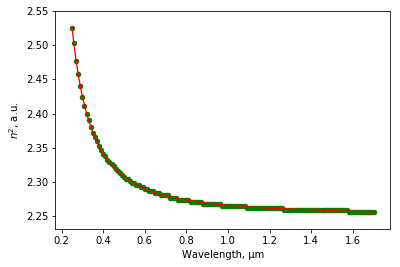

In [156]:
plt.scatter(xdata_glass, ydata_glass, color='g', s=20),
plt.xlabel('Wavelength, µm'),
plt.ylabel('$n^2$, a.u.')
plt.plot(xdata_glass, yfit, linewidth=1.3, color='r')

The fit is good to go. Now we need to put it into use.

The glass data cover the range 0.25-1.7$\mu m$, whereas Ag data 0.188-1.937$\mu m$. As the LSPR effect is very weak near 1$\mu m$, we will cover the range 0.2-1.2$\mu m$.

In [157]:
# new wavelength range for our modelling
xnew = np.arange(0.250, 1.201, 0.001)

In [158]:
# Sellmeier fit for the soda-lime glass with fitted parameters.
ynew_gl = Sellmeier_3(xnew, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5])

In [159]:
# Sellmeier equation gives n^2, so square root must be used
ynew_glass = pow(ynew_gl, 0.5)

### Regularizing the data spacing - Ag data

In [160]:
# Preprocess the data

# add values separated by 1nm with NaN as missing values if the value is not there
new_add_1 = pd.DataFrame(xnew, columns=['Wavelength, µm'])
new_add_2 = pd.DataFrame(columns=['epsilon_1', 'epsilon_2']).fillna(np.nan)
Ag_additional = pd.concat([new_add_1, new_add_2], axis=0, keys=['Wavelength, µm', 'epsilon_1', 'epsilon_2'])

Ag_extended = pd.concat([eps_Ag, Ag_additional])

# sort the new dataframe and drop duplicates
Ag_extended = Ag_extended.drop_duplicates(subset='Wavelength, µm').sort_values(by='Wavelength, µm')

# reset the index and drop the old one
Ag_extended = Ag_extended.reset_index(drop=True)

# interpolate the NaNs with dataframe.interpolate() - linear interpolation
Ag_extended = Ag_extended.interpolate()

# extract the values separated by 1nm
#    warto skorzystać z funkcji .isin()
# trzeba zmodyfikować później, bo na tą chwilę jest nieelastyczne
Ag_regspace = Ag_extended[Ag_extended['Wavelength, µm'].isin(Ag_additional['Wavelength, µm'])]

# reset index
Ag_regspace = Ag_regspace.reset_index(drop=True)

/Applications/anaconda3/envs/Python_3_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Regularizing the data spacing - $k$ data for soda-lime glass

In [161]:
# Preprocess the data

# add values separated by 1nm with NaN as missing values if the value is not there
glass_add_1 = pd.DataFrame(xnew, columns=['Wavelength, µm'])
glass_add_2 = pd.DataFrame(columns=['k']).fillna(np.nan)
glass_additional = pd.concat([glass_add_1, glass_add_2], axis=0, keys=['Wavelength, µm', 'k'])

glass_additional

glass_k = data_glass.drop(columns=['n'])

glass_extended = pd.concat([glass_k, glass_additional])

# sort the new dataframe and drop duplicates
glass_extended = glass_extended.drop_duplicates(subset='Wavelength, µm').sort_values(by='Wavelength, µm')

# reset the index and drop the old one
glass_extended = glass_extended.reset_index(drop=True)

# interpolate the NaNs with dataframe.interpolate() - linear interpolation
glass_extended = glass_extended.interpolate()

# extract the values separated by 1nm
#    warto skorzystać z funkcji .isin()
# trzeba zmodyfikować później, bo na tą chwilę jest nieelastyczne
glass_regspace = glass_extended[glass_extended['Wavelength, µm'].isin(glass_additional['Wavelength, µm'])]

# Add the Sellmeier data into the glass subset

glass_regspace['n'] = pow(Sellmeier_3(glass_regspace['Wavelength, µm'], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]), 0.5)

/Applications/anaconda3/envs/Python_3_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/Applications/anaconda3/envs/Python_3_test_env/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [162]:
glass_regspace.head(10)

,"Wavelength, µm",k,n
0,0.250,0.000006,1.589637
1,0.251,0.000006,1.588720
2,0.252,0.000006,1.587819
3,0.253,0.000006,1.586932
4,0.254,0.000006,1.586060
5,0.255,0.000006,1.585203
6,0.256,0.000006,1.584359
7,0.257,0.000006,1.583529
8,0.258,0.000006,1.582712
9,0.259,0.000006,1.581909


### Define $f_{abs}$, $f_{sca}$ and $I_{1}$, $I_{2}$ functions

In [25]:
# Define f_abs function
def f_abs(e_m, e_1, e_2, l_0, C_tot, t):
    c_abs = ((0.8686 * pow(pi, 5)) * 1e-30) / 3
    f_abs = div(c_abs * C_tot * t * mul(div(pow(e_m, 2), pow(l_0, 4)), add(pow(sub(e_1, e_m), 2), pow(e_2, 2))), add(pow(add(e_1, 2*e_m), 2), pow(e_2, 2)))
    return f_abs

In [58]:
# Define f_sca function
def f_sca(e_m, e_1, e_2, l_0, C_tot, t):
    c_sca = 1.3029 * pow(pi, 2) * 1e-21
    f_sca = div(c_sca * C_tot * t * mul(div(pow(e_m, 1.5), (l_0)), (e_2)), add(pow(add(e_1, 2*e_m), 2), pow(e_2, 2)))
    return f_sca

In [59]:
# Define integrals 1 and 2 - I_1
def I_1(d, n, mean, sd):
    integrand = mul(pow(d, n), stats.norm.pdf(d, loc=mean, scale=sd))
    return integrate.simps(integrand, d)

### Final form of the transmittance equation

We now have all needed to perform the simulation. To wrap this up let's get back to the equation for the $A_{composite}$:

$A_{composite} = 5.4576\frac{k_{glass}t}{\lambda} + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{1}(d, mean, sd) + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{2}(d, mean, sd)$

$T = (1-R)e^{-A_{composite}} = \underbrace{\left( 1 - \left| \frac{1 - n_{glass}}{1 + n_{glass}} \right|^{2} \right)}_{Account for Reflectance} \underbrace{e^{-\left( 5.4576\frac{k_{glass}t}{\lambda} + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{1}(d, mean, sd) + f_{abs}(\epsilon_{m}, \epsilon_{1}, \epsilon_{2}, \lambda_{0}, C_{tot}, t) \cdot I_{2}(d, mean, sd) \right)}}_{Account for Absorbance}$

In [163]:
def A_comp(glass_dataframe, metal_dataframe, C_tot, t, mean, sd):
    n_glass = glass_dataframe['n']
    k_glass = glass_dataframe['k']
    eps_m = pow(glass_dataframe['n'], 2)
    l_0 = glass_dataframe['Wavelength, µm']
    e_1 = metal_dataframe['epsilon_1']
    e_2 = metal_dataframe['epsilon_2']
    d = np.linspace(0,100, 100)

    # Reflection losses
    L = sub(1, n_glass)
    M = add(1, n_glass)
    R = pow(np.abs(div(L, M)), 2)
    refl_losses = sub(1, R)
    
    # Define A_glass function
    def A_glass(k_glass, l_0, t):
        L1 = mul(k_glass, t)
        return 5.4576 * div(L1, l_0)
    
    # A_nano - inner function
    def A_nano(eps_m, e_1, e_2, l_0, mean, sd, C_tot, t, d):
        A_nano = add(mul(f_abs(eps_m, e_1, e_2, l_0, C_tot, t), I_1(d, 6, mean, sd)), mul(f_sca(eps_m, e_1, e_2, l_0, C_tot, t), I_1(d, 3, mean, sd)))
        return A_nano
    
    A_glass_matrix = A_glass(k_glass, l_0, t)
    A_nano_Ag = A_nano(eps_m, e_1, e_2, l_0, mean, sd, C_tot, t, d)
    transmittance = mul(refl_losses, np.exp(-add(A_glass_matrix, A_nano_Ag)))
    
    T_composite = pd.DataFrame(glass_dataframe['Wavelength, µm'], columns=['Wavelength, µm'])
    T_composite['Transmittance, %'] = 100 * transmittance
    
    return T_composite

## Testing the result

With the above function we are now ready to do the testing. For spherical nanoparticles:
1. increase of nanoparticle diameter $d$ increases the $\sigma_{abs}$ and $\sigma_{sca}$ and increases the $A_{nano}$ absorbance (decreases transmittance $T$)
2. increase of total nanoparticle concentration $C_{tot}$ increases the $A_{nano}$ absorbance (decreases transmittance $T$)
3. the broader the nanoparticle size distribution, the stronger the effect of $\delta^{6}$ and $\delta^{3}$ terms, resulting in higher $A_{nano}$ absorbance (decreased transmittace $T$)

### The effect of nanoparticle diameter $d$

For this test we will set some boundary conditions:
- thickness $t$: 200$\mu m$
- nanoparticle diameters $\delta$: 10, 20, 30nm
- standard deviation of nanoparticle size distribution $sd$: 5nm
- total concentration $C_{tot}$: $1 \cdot 10^{12} \frac{1}{cm^{3}}$

In [164]:
diam_effect10 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 5)
diam_effect20 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 20, 5)
diam_effect30 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 30, 5)

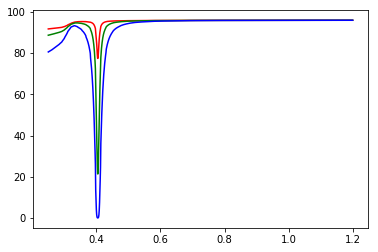

In [165]:
plt.plot(diam_effect10['Wavelength, µm'], diam_effect10['Transmittance, %'], color='r')
plt.plot(diam_effect20['Wavelength, µm'], diam_effect20['Transmittance, %'], color='g')
plt.plot(diam_effect30['Wavelength, µm'], diam_effect30['Transmittance, %'], color='b')

Indeed, the bigger the nanoparticles, the more pronounced "dip" from the surface plasmon resonance.

### The effect of nanoparticle concentration $C_{tot}$

Boundary conditions for this test:
- thickness $t$: 200$\mu m$
- nanoparticle diameters $\delta$: 30nm
- standard deviation of nanoparticle size distribution $sd$: 5nm
- total concentration $C_{tot}$: $1 \cdot 10^{10} \frac{1}{cm^{3}}$, $1 \cdot 10^{11} \frac{1}{cm^{3}}$, $1 \cdot 10^{12} \frac{1}{cm^{3}}$

In [171]:
conc_effect10 = A_comp(glass_regspace, Ag_regspace, 1e10, 200, 30, 5)
conc_effect20 = A_comp(glass_regspace, Ag_regspace, 1e11, 200, 30, 5)
conc_effect30 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 30, 5)

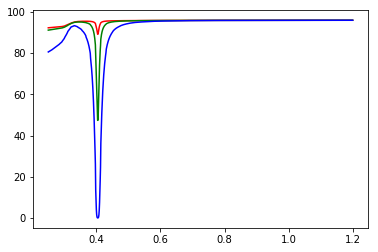

In [172]:
plt.plot(conc_effect10['Wavelength, µm'], conc_effect10['Transmittance, %'], color='r')
plt.plot(conc_effect20['Wavelength, µm'], conc_effect20['Transmittance, %'], color='g')
plt.plot(conc_effect30['Wavelength, µm'], conc_effect30['Transmittance, %'], color='b')

Increasing nanoparticle concentration very strongly influences the transmittance spectra. A 10-fold change in the $C_{tot}$ causes a 10-fold increase of $A_{nano}$ absorbance, resulting in stronger effect.

### The effect of nanoparticle size distribution

This effect is more pronounced for larger nanoparticles, due to the $\delta^{6}$ and $\delta^{3}$ terms in $\sigma_{abs}$ and $\sigma_{sca}$. First, let's check the difference for 10nm nanoparticles with 3 different standard deviations.

For this test we will set some boundary conditions:
- thickness $t$: 200$\mu m$
- nanoparticle diameters $\delta$: 10nm
- standard deviation of nanoparticle size distribution $sd$: 5, 10, 15nm
- total concentration $C_{tot}$: $1 \cdot 10^{12} \frac{1}{cm^{3}}$

In [182]:
dist_effect105 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 5)
dist_effect1010 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 10)
dist_effect1015 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 15)

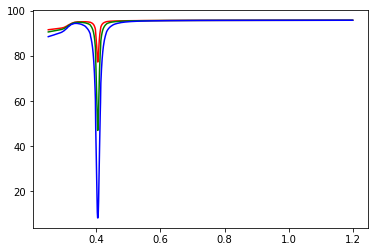

In [183]:
plt.plot(dist_effect105['Wavelength, µm'], dist_effect105['Transmittance, %'], color='r')
plt.plot(dist_effect1010['Wavelength, µm'], dist_effect1010['Transmittance, %'], color='g')
plt.plot(dist_effect1015['Wavelength, µm'], dist_effect1015['Transmittance, %'], color='b')

Small nanoparticles (10nm) show a pronounced effect of distribution broadening on the transmittance. Generally, for 10nm samples, higher _standard deviation_ results in stronger LSPR effect.

Now, if we take 20nm nanoparticles, something interesting will happen.

In [184]:
dist_effect205 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 20, 5)
dist_effect2010 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 20, 10)
dist_effect2015 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 20, 15)

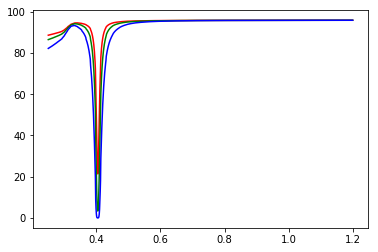

In [185]:
plt.plot(dist_effect205['Wavelength, µm'], dist_effect205['Transmittance, %'], color='r')
plt.plot(dist_effect2010['Wavelength, µm'], dist_effect2010['Transmittance, %'], color='g')
plt.plot(dist_effect2015['Wavelength, µm'], dist_effect2015['Transmittance, %'], color='b')

The difference can still be seen, but it's far less visible.

If the diameter is increased by yet another 10nm, to 30nm.

In [186]:
dist_effect305 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 30, 5)
dist_effect3010 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 30, 10)
dist_effect3015 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 30, 15)

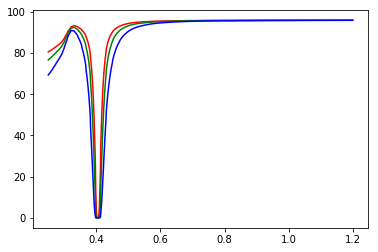

In [187]:
plt.plot(dist_effect305['Wavelength, µm'], dist_effect305['Transmittance, %'], color='r')
plt.plot(dist_effect3010['Wavelength, µm'], dist_effect3010['Transmittance, %'], color='g')
plt.plot(dist_effect3015['Wavelength, µm'], dist_effect3015['Transmittance, %'], color='b')

Then all samples reach the same minimum of $0%$ transmittance and only the change in broadening remains.

Interestingly, for very narrow distributions, the effect will be very weak as well.

For this test we will set some boundary conditions:
- thickness $t$: 200$\mu m$
- nanoparticle diameters $\delta$: 10nm
- standard deviation of nanoparticle size distribution $sd$: 1, 2, 5nm
- total concentration $C_{tot}$: $1 \cdot 10^{12} \frac{1}{cm^{3}}$

In [201]:
dist_effect101 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 1)
dist_effect102 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 2)
dist_effect105 = A_comp(glass_regspace, Ag_regspace, 1e12, 200, 10, 5)

(0.25, 0.5)

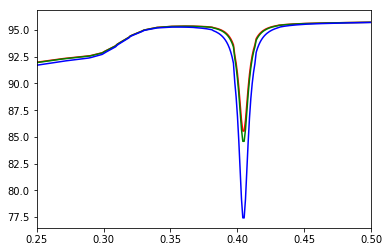

In [202]:
plt.plot(dist_effect101['Wavelength, µm'], dist_effect101['Transmittance, %'], color='r')
plt.plot(dist_effect102['Wavelength, µm'], dist_effect102['Transmittance, %'], color='g')
plt.plot(dist_effect105['Wavelength, µm'], dist_effect105['Transmittance, %'], color='b')
plt.xlim(0.25, 0.5)

Note that the difference between distributions with very small $sd$ (1 and 2) becomes almost negligible - it's merely seen on the bottom of the resonance peak.

## What more can be done?

There several effects we have not accounted for in this Notebook. To name the most important:
1. shape of the nanoparticles
2. limited detection cone of the UV-Vis measurement setup
3. quantum nature of the plasmonic effect at very small particle sizes
4. multiple reflections inside the sample

For real life measurements one should keep this in mind and if need be, adjust this project.